> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB Movie Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="Python modules and Data Import">Data Wrangling</a></li>
<li><a href="#wrangling and Cleaning">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>
> The data investigated, analyzed, and interpreted in this report is a "TMDB movie" data provided in the Data Analysis Udacity Class. No other data gathering was done.  
> 
The data set contains information about 10,000 movies produced between 1966 and 2015.  
The following is an outline of the high-level workflow conducted in the report:  
> 1- Clean Data..
     - Drop duplicate rows, if any.  
     - Filter rows with no values from movie features needed in statistical analysis and building correlation.  
     - Analyze data types. Change data typf if necessary.  
> 2- Segregate columns with different entries into multiple columns.  
> 3- Plot preliminary histograms to better understand data.  
> 4- Analyze data types  
> 3- Clean/filter data column if needed in analysis  
> 4- Set the questions to answer (list below)  
> 5- Visualise data, make plots to help answering question and making interpretations   
> 4- Conclude  
>
> The questions to be answered analyzing the movie dataset are:  
> a- What years/decades were the most lucrative in movie productions? Any idea why?  
> b- What is the most produced genres of movies? does people's ratings justify production?
> c- What is the most lucrative production studio (# of movies/year, investment/year, net/year)?    
> d- Properties/Specifics of high revenue movies? is high revenue related to specific genres?  
> e- Who are the most active actors?  Do they get the highest ratings?
> f- Is high revenue related to a pool of directors? cast members?  
> g- Any correlation between genre and run time?  
> h- Any correlation between popularity and run time? 


## Import Needed Modules

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

## Load Data

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [5]:
# size of the dataframe
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Cleaning

### Remove Duplicate Rows

In [7]:
# Locate the duplicated row
duplicate_rows = df[df.duplicated()]
print(duplicate_rows);

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


In [8]:
# find if there are any duplicated rows, and how many
df.duplicated().sum()

1

In [9]:
# drop duplicate row
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

### Split Features with Multiple entries

Take hybrid rows and split them into multiple new rows.
#### - Cast
#### - Genre  
#### - Director  

In [10]:
# change data type of cast and genres features
# convert cast and genres to string
#feature_convert = ['cast', 'genres']
#for c in feature_convert:
#    df[c] = df[c].astype(str)

In [11]:
#cast_list = df['cast'].str[0:].str.split('|',expand = True)
#df.genres['genreA'] = df.genres[df.genres['name' == genre_list[0]]]

In [12]:
# split the genre column 
genre_list = df['genres'].str[0:].str.split('|',expand = True)
num_genre = genre_list.shape[1]
genre_list;
df['main_genre'] = genre_list[0]
df['genre2'] = genre_list[1]
df['genre3'] = genre_list[2]
df['genre4'] = genre_list[3]
df['genre5'] = genre_list[4]
df.shape

(10865, 26)

In [13]:
# split the cast column 
cast_list = df['cast'].str[0:].str.split('|',expand = True)
num_cast = cast_list.shape[1]
cast_list;
df['lead_cast'] = cast_list[0]
df['cast2'] = cast_list[1]
df['cast3'] = cast_list[2]
df['cast4'] = cast_list[3]
df['cast5'] = cast_list[4]
df['lead_cast'].shape

(10865,)

In [14]:
# split the Director column 
director_list = df['director'].str[0:].str.split('|',expand = True)
num_director = director_list.shape[1]
director_list;
df['lead_director'] = director_list[0]

df['lead_cast'].shape

(10865,)

In [15]:
## check that all the original hybrid rows with "|"s are gone
#df_08[df_08['fuel'].str.contains('/')]

In [16]:
df.shape

(10865, 32)

In [17]:
# drop original cast and genres columns
#df = df.drop(['cast','genres'], axis=1)
#df.shape

In [18]:
#check how many movies have different genre's classification to decide what is the main genre to work with later.
df['main_genre'].count();
df['genre2'].count();
df['genre3'].count();
df['genre4'].count();
df['genre5'].count();

'genre1', reported for each movie, will be considered the prime genre of each movie. Secondary genres will be ignored...and dropped from the edited dataframe.

In [19]:
df = df.drop(['genre2','genre3','genre4','genre5'], axis=1)
df.shape

(10865, 28)

Similarly, only the lead cast member will be considered in movie statistics. The other cast members will be ignored. 

In [20]:
#check how many cast members are reported for each movies. 
df['lead_cast'].count(); 
df['cast2'].count();
df['cast3'].count();
df['cast4'].count();
df['cast5'].count();

The majority of the movies have at least a lead cast member reported. 

In [21]:
df = df.drop(['cast2','cast3','cast4','cast5'], axis=1)
df.shape

(10865, 24)

In [22]:
df.to_csv('tmdb-movies_edited.csv', index=False)

### Drop Features Not Needed in Statistical Analysis

Some of the features will not be needed in any statitical analyses or data interpretation: e.g., 'id', 'tagline', 'keyword', 'overview', or 'homepage'. These features will be dropped from the dataframe. 
A new data frame will be carried through.

In [23]:
# make a copy of the dataframe and drop columns that will not be needed in any analysis.  
df_slim = df.drop(['id','imdb_id','homepage','tagline','keywords','overview'], axis=1)
df_slim.shape

(10865, 18)

### Features and Missing Values

Check if there are rows with null values. Decided what missing data can be ignored as it will not be part of statistical analyses and which rows neded to be filtered.

In [24]:
# Check that there are not longer rows with missing values
df_slim.isnull().sum().any()

True

In [25]:
# view missing value count for each movie feature
df_slim.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
main_genre                23
lead_cast                 76
lead_director             44
dtype: int64

As seen in the table above, some feature are missing from some movies. While other features are reported for all movies.

In [39]:
df_slim.shape

(9772, 18)

#### The shape of the df_slim dataframe shows that 1,093 data points were lost from the original data set because the movies did not have all attributes reported.

### Filter Rows with Missing Values

Movies with no combined director, cast, production company, and genre reported will be removed from the dataframe. 

In [ ]:
# filter rows with no values 
df_filt = df_slim
df_filt.dropna(inplace=True)
df_filt.shape

### Preliminary Data Visualization on Features With no Missing Values
#### 1- Money-related features  
#### 2- Rating-related features  
#### 3- Production-related features

In [26]:
# Isolate columns with no missing values into 2 dataframes  
df_money = df[['budget_adj','revenue_adj']]
df_rating =df[['popularity','vote_average']]

#### 1- Money-related Features  

In [27]:
df_money = df[['budget_adj','revenue_adj']]
df_rating =df[['popularity','vote_average','vote_count']]

In [28]:
df_rating;

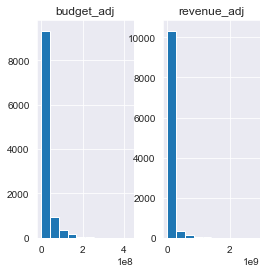

In [29]:
#plot histogram of movie adjusted budget and recvenue
df_money.hist(figsize=(4,4));

In [30]:
mean_budget = df.budget_adj.mean()
mean_budget

17549894.037320614

In [31]:
mean_revenue = df.revenue_adj.mean()
mean_revenue

51369001.75884257

#### Movie making is a great investment. Production companies more than double their money making movies. Their Cumulative revenues has been steadily climbing over the years. 

Text(0.5, 1.0, 'Cumulative Adjusted Movie Revenue')

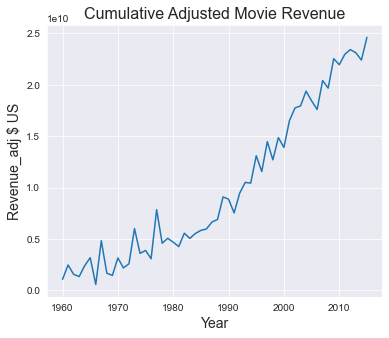

In [552]:
# Produce a plot of cumulative/total movie revenue for every year
min = df.release_year.min()
max = df.release_year.max()
years = np.arange(min,max+1)
years = years.tolist()

revenue_per_yr = []
for n in range(min, max+1):
    x = df[df['release_year'] == n]
    revenue_per_1yr = x['revenue_adj'].sum()
    revenue_per_yr.append(revenue_per_1yr)

    
# Plot adjusted revenue per year:
fig, ax1 = plt.subplots(figsize=(6,5))
plt.plot(years, revenue_per_yr)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Revenue_adj $ US', fontsize=14)
ax1.set_title('Cumulative Adjusted Movie Revenue', fontsize=16)

#### 2- Rating-related Features  

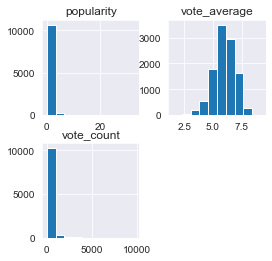

In [678]:
#plot histogram of movie ratings and popularity
df_rating.hist(figsize=(4,4), bins=10);

Text(0.5, 1.0, 'Popularity and Vote_Count Correlation')

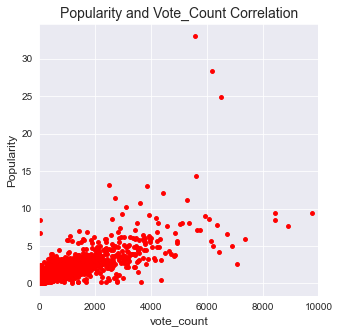

In [34]:
# Check corrlation between Popularity and Vote_count as they have similar distributions: 
fig, ax13 = plt.subplots(figsize=(5,5))
plt.scatter(df['vote_count'], df['popularity'], s=15, c='r')
ax13.set_xlabel('vote_count', fontsize=12)
ax13.set_xlim([0, 10000])
ax13.set_ylabel('Popularity', fontsize=12)
ax13.set_title('Popularity and Vote_Count Correlation', fontsize=14)
#plt.legend(loc="upper left")

#### Bothe popularity and vote_count have skewed distributions. The vote_average has a normal distribution.  

##### It is unclear what the "popularity" values mean if other than the movie was popular enough to draw vote countes. This is indicated by the the positive correlation between vote_count and popularity. The former seems to indicate the viewers interest in a movie and willingness to give an opinion anout it.


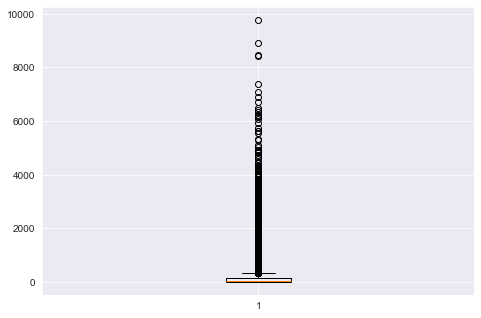

In [685]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(df['vote_count'])
plt.show()

10633

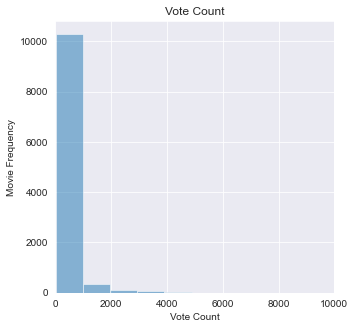

In [717]:
# check how lucrative movie production was over the years:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(df['vote_count'], alpha=0.5, label='vote count')
ax.set_title('Vote Count')
ax.set_xlabel('Vote Count')
ax.set_xlim([0, 10000])
ax.set_ylabel('Movie Frequency')
#ax.set_ylim([0, 200])

n = (df['vote_count']<=2000).sum()
n

#### The plots above show  that the vote_count data make a skewed distribution. The majority of the movies (>10,632 of them) have less than 2000 votes contributing to theie average ratings.  
Movies with vote_counts > 2000 votes seems to be outliers!! this raises the question of what the reason(s) is for very high vote counts for ~2% of the movies?

In [686]:
df['vote_count'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      10.0
0.1      12.0
0.2      15.0
0.3      19.0
0.4      26.0
0.5      38.0
0.6      60.0
0.7     104.0
0.8     204.0
0.9     508.0
1.0    9767.0
Name: vote_count, dtype: float64

In [687]:
df['vote_count'].describe()

count    10865.000000
mean       217.399632
std        575.644627
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

10633

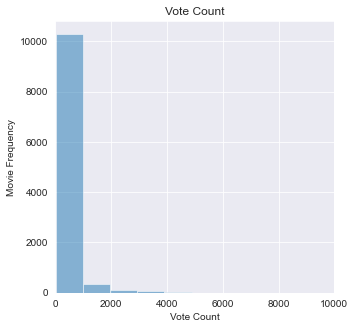

In [719]:
# View if there is a correlation between vote_count and vote_average:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(df['vote_count'], alpha=0.5, label='vote count')
ax.set_title('Vote Count')
ax.set_xlabel('Vote Count')
ax.set_xlim([0, 10000])
ax.set_ylabel('Movie Frequency')
#ax.set_ylim([0, 200])

n = (df['vote_count']<=2000).sum()
n

Text(0.5, 1.0, 'Vote: Average-Count Correlation')

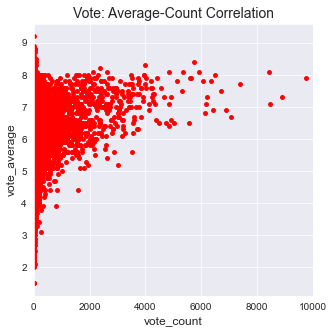

In [35]:
# check how lucrative movie production was over the years:
fig, ax11 = plt.subplots(figsize=(5,5))
plt.scatter(df['vote_count'], df['vote_average'], s=15, c='r')
ax11.set_xlabel('vote_count', fontsize=12)
ax11.set_xlim([0, 10000])
ax11.set_ylabel('vote_average', fontsize=12)
ax11.set_title('Vote: Average-Count Correlation', fontsize=14)
#plt.legend(loc="upper left")

Text(0.5, 1.0, 'Vote: Average-Count Correlation')

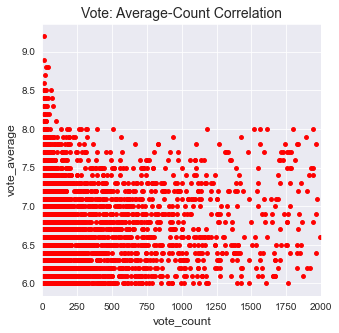

In [36]:
collist = ['vote_count','vote_average']
low_count = df.loc[(df['vote_count']<=2000) & (df['vote_average'] >= 6),['vote_count','vote_average']]
 #df.loc[(df['vote_count']<=2000 & (df['vote_average'] >= 6)),['vote_count','vote_average']]
#low_count[collist]


fig, ax22 = plt.subplots(figsize=(5,5))
plt.scatter(low_count['vote_count'],low_count['vote_average'], s=15, c='r')
ax22.set_xlabel('vote_count', fontsize=12)
ax22.set_xlim([0, 2000])
ax22.set_ylabel('vote_average', fontsize=12)
ax22.set_title('Vote: Average-Count Correlation', fontsize=14)
#plt.legend(loc="upper left")

#### There does not seem to be a correlation showing that the vote_count gives a more reliable vote_average or rating. 

#### 3- Procution-related Features  

Below, changes of the numbers of movies produced every year and every decade are investigated. 

Text(0.5, 1.0, 'Movie Count / Decade')

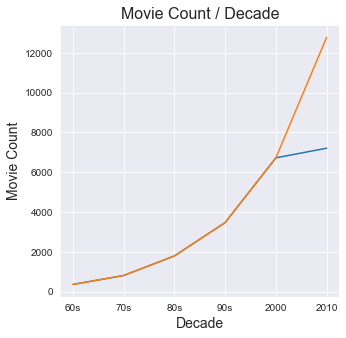

In [550]:
# Plot movoie count per decade:

Year = ('60s','70s','80s','90s','2000','2010')
# df[df.release_year <= '1969'].shape[0] 
movie_in_60 = len(df.query('release_year >= 1960' and 'release_year < 1970', inplace = False))
movie_in_70 = len(df.query('release_year >= 1970' and 'release_year < 1979', inplace = False))
movie_in_80 = len(df.query('release_year >= 1980' and 'release_year < 1989', inplace = False))
movie_in_90 = len(df.query('release_year >= 1990' and 'release_year < 1999', inplace = False))
movie_in_20 = len(df.query('release_year >= 2000' and 'release_year < 2009', inplace = False))
movie_in_21 = len(df.query('release_year >= 2010', inplace = False))
movie_count_decade1 = (movie_in_60,movie_in_70,movie_in_80,movie_in_90,movie_in_20,2*movie_in_21)
movie_count_decade2= (movie_in_60,movie_in_70,movie_in_80,movie_in_90,movie_in_20,1.9*movie_in_20)
#ratio = np.array(movie_in_70/movie_in_60, movie_in_80/movie_in_70, movie_in_90/movie_in_80, movie_in_20/movie_in_90,movie_in_21/movie_in_20)

# check how lucrative movie production was over the years:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(Year, movie_count_decade1, Year, movie_count_decade2)
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Movie Count', fontsize=14)
ax.set_title('Movie Count / Decade', fontsize=16)

#### Movie production was increasing every decade since 1960.  
Note that the movie count from 2010-2020 was calculated in 2 different ways;  
- The blue curve assumes that the number of movies produced from 2010-2020 is simply double that of 2010-2015.  
- The orange curve takes an average movie count increase factor (~1.9; based on given data) and multiplying it with movie counts in 2000-2009. 

In [551]:

#sixties = np.arange(min,min+10)
#seventies = np.arange(sixties[-1]+1,sixties[-1]+1+10)
#eighties = np.arange(seventies[-1]+1,seventies[-1]+1+10)
#nineties = np.arange(eighties[-1]+1,eighties[-1]+1+10)
#thousands = np.arange(nineties[-1]+1,nineties[-1]+1+10)
#thousand10 = np.arange(thousands[-1]+1,max+1)

Unsurprisingly, with the total movie production (# of movies produced) increasing steadily since 1960, the movie revenus were also increasing. Note that the movie revenes in 2015 eared 25 billion US dollars.

As we can see we lost more than 1000 data points from the original data set because the movies did not have all attributes reported.

## Preliminary Statistics and Data Visualization on (filtered) Features:
### - Movie Genre and Ratings
### - Ratings and Runtime
### - Production Companies
### - Movie Lead Cast
### - Movie Directors 

## Plot Genre Count Over Years

In [555]:
df_filt.dtypes;

ValueError: too many values to unpack (expected 2)

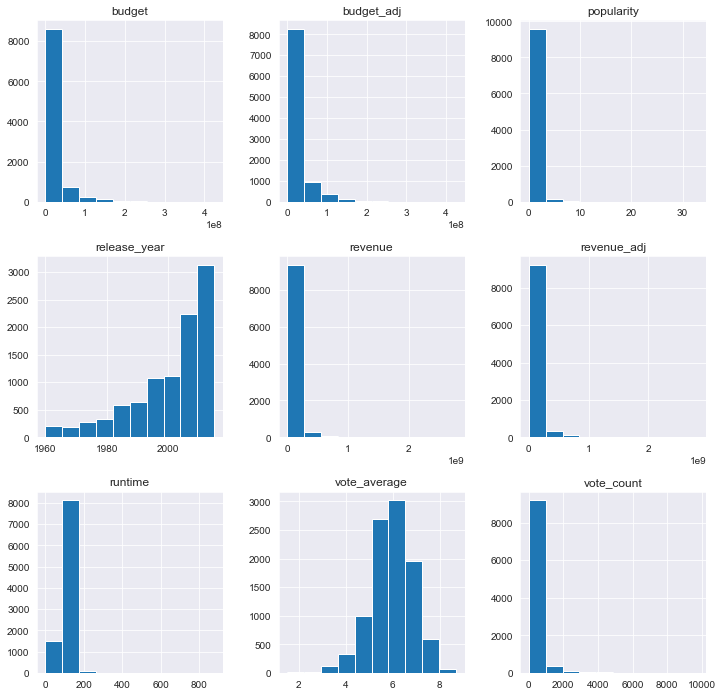

In [556]:
## histograms of the properties left
fig, ax = df_filt.hist(figsize=(12,12));

#ax.hist(df['release_year'], alpha=0.5, label='movie count')
ax.set_title('Total Movie Count', fontsize=14)
ax.set_xlabel('Year', labelsize=14)
ax.set_ylabel('Movie Count', labelsize=14)

In [ ]:
# to collapse large cells

#pip install jupyter_contrib_nbextensions
#jupyter contrib nbextension install --user

In [ ]:
min = df_filt.release_year.min(); 
max = df_filt.release_year.max()
#create a list of years
years = np.arange(min,max+1)
years = years.tolist()
year_span = np.arange(min,max+1)
#--------------------------------------------------------------------------------------------------------------------

Action = []; Adventure = []; Animation =[]; Comedy =[]; Crime =[]; Documentary =[]; Drama = []; Family =[]; Fantasy =[];
Foreign = []; History =[]; Horrow =[]; Music =[]; Mystery =[]; Romance =[]; SciFi =[]; Thriller =[]; War =[]; Western =[]


In [557]:
# create a list of genre to investigate
genres =('Action','Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign','History', 'Horror', 'Music','Mystery','Romance', 'SciFi', 'Thriller', 'War','Western')
num_genre = len(genres)


##THIS IS NOT WORKING
## create empty lists to populate with genre coutn
#Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasy, Foreign, History, Horror, Music, Mystery, Romance, SciFi, Thriller, War, Western  = ([] for i in range(len(genres)))


In [558]:
Action = []; Adventure = []; Animation =[]; Comedy =[]; Crime =[]; Documentary =[]; Drama = []; Family =[]; Fantasy =[];
Foreign = []; History =[]; Horror =[]; Music =[]; Mystery =[]; Romance =[]; SciFi =[]; Thriller =[]; War =[]; Western =[]

for n in range(0, len(years)):
    #print(n)
    #print(str(years[n]))
    year = years[n]
    
    action = df_filt.query('release_year == @year & main_genre.str.startswith("Ac").values')
    action = action['main_genre'].count() 
    Action.append(action)
    
    adventure = df_filt.query('release_year == @year & main_genre.str.startswith("Ad").values')
    adventure = adventure['main_genre'].count() 
    Adventure.append(adventure)
    
    anim = df_filt.query('release_year == @year & main_genre.str.startswith("An").values')
    anim = anim['main_genre'].count() 
    Animation.append(anim)

    comedy = df_filt.query('release_year == @year & main_genre.str.startswith("Co").values')
    comedy = comedy['main_genre'].count() 
    Comedy.append(comedy)
    
    crime = df_filt.query('release_year == @year & main_genre.str.startswith("Cr").values')
    crime = crime['main_genre'].count() 
    Crime.append(crime)
    
    docu = df_filt.query('release_year == @year & main_genre.str.startswith("Do").values')
    docu = docu['main_genre'].count() 
    Documentary.append(docu)
    
    drama = df_filt.query('release_year == @year & main_genre.str.startswith("Dr").values')
    drama = drama['main_genre'].count() 
    Drama.append(drama)
    
    family = df_filt.query('release_year == @year & main_genre.str.startswith("Fam").values')
    family = family['main_genre'].count() 
    Family.append(family)
    
    fantasy = df_filt.query('release_year == @year & main_genre.str.startswith("Fan").values')
    fantasy = fantasy['main_genre'].count() 
    Fantasy.append(fantasy)
    
    foreign = df_filt.query('release_year == @year & main_genre.str.startswith("Fo").values')
    foreign = foreign['main_genre'].count() 
    Foreign.append(foreign)
    
    history = df_filt.query('release_year == @year & main_genre.str.startswith("Hi").values')
    history = history['main_genre'].count() 
    History.append(history)
    
    horror = df_filt.query('release_year == @year & main_genre.str.startswith("Ho").values')
    horror = horror['main_genre'].count() 
    Horror.append(horror)
    
    music = df_filt.query('release_year == @year & main_genre.str.startswith("Mu").values')
    music = music['main_genre'].count() 
    Music.append(music)
        
    mystery = df_filt.query('release_year == @year & main_genre.str.startswith("My").values')
    mystery = mystery['main_genre'].count() 
    Mystery.append(mystery)
    
    romance = df_filt.query('release_year == @year & main_genre.str.startswith("R").values')
    romance = romance['main_genre'].count() 
    Romance.append(romance)
    
    scifi = df_filt.query('release_year == @year & main_genre.str.startswith("S").values')
    scifi = scifi['main_genre'].count() 
    SciFi.append(scifi)
    
    thrill = df_filt.query('release_year == @year & main_genre.str.startswith("T").values')
    thrill = thrill['main_genre'].count() 
    Thriller.append(thrill)
    
    war = df_filt.query('release_year == @year & main_genre.str.startswith("Wa").values')
    war = war['main_genre'].count() 
    War.append(war)
    
    west = df_filt.query('release_year == @year & main_genre.str.startswith("We").values')
    west = west['main_genre'].count() 
    Western.append(west)

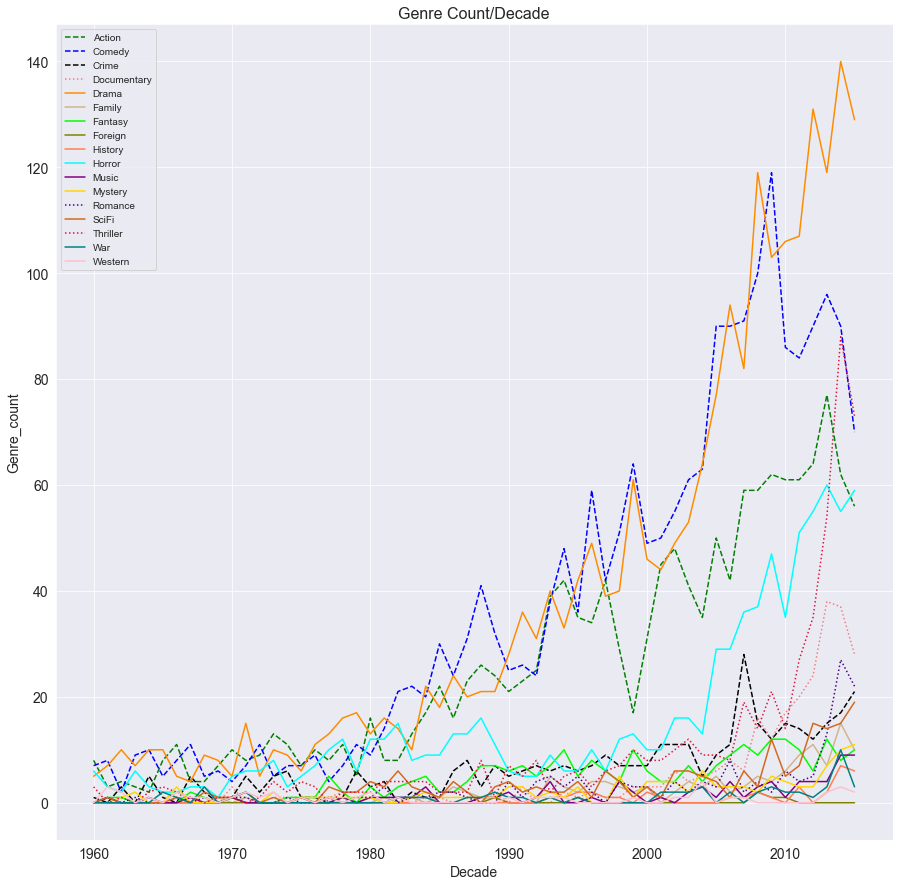

In [559]:
# Plot adjusted revenue per year:
fig, ax3 = plt.subplots(figsize=(15,15))
plt.plot(years, Action, "--g", label = 'Action')
plt.plot(years, Comedy, "--b",  label = 'Comedy')
plt.plot(years, Crime, "--k",  label = 'Crime')
plt.plot(years, Documentary, color='lightcoral', linestyle=':', label = 'Documentary')
plt.plot(years, Drama, color="darkorange", label = 'Drama')
plt.plot(years, Family,color="tan",  label = 'Family')
plt.plot(years, Fantasy, color="lime", label = 'Fantasy')
plt.plot(years, Foreign, color="olive", label = 'Foreign')
plt.plot(years, History, color="coral", label = 'History')
plt.plot(years, Horror, color="cyan", label = 'Horror')
plt.plot(years, Music, color="purple", label = 'Music')
plt.plot(years, Mystery, color="gold", label = 'Mystery')
plt.plot(years, Romance, color="indigo", linestyle=':', label = 'Romance')
plt.plot(years, SciFi, color="chocolate", label = 'SciFi')
plt.plot(years, Thriller, color="crimson", linestyle=':', label = 'Thriller')
plt.plot(years, War, color="teal", label = 'War')
plt.plot(years, Western, color="pink", label = 'Western')

ax3.set_xlabel('Decade', fontsize=14)
ax3.set_ylabel('Genre_count', fontsize=14)
ax3.set_title('Genre Count/Decade', fontsize=16)
plt.legend(loc="upper left")

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

#### It is clear from the movie genre count plot that some genres became really popular over the years; the Drama, Comedy, Action genres started to increase remarkably sicne 1980. Other genres, such as Horror and Thriller, start to catch up (in number/year) since 2002 or shortly after. 

#### The rest of genres had increased shyly in numbers over the years (Adventures, Animation, Crime, etc.) or not at all (e.g., western movie). 

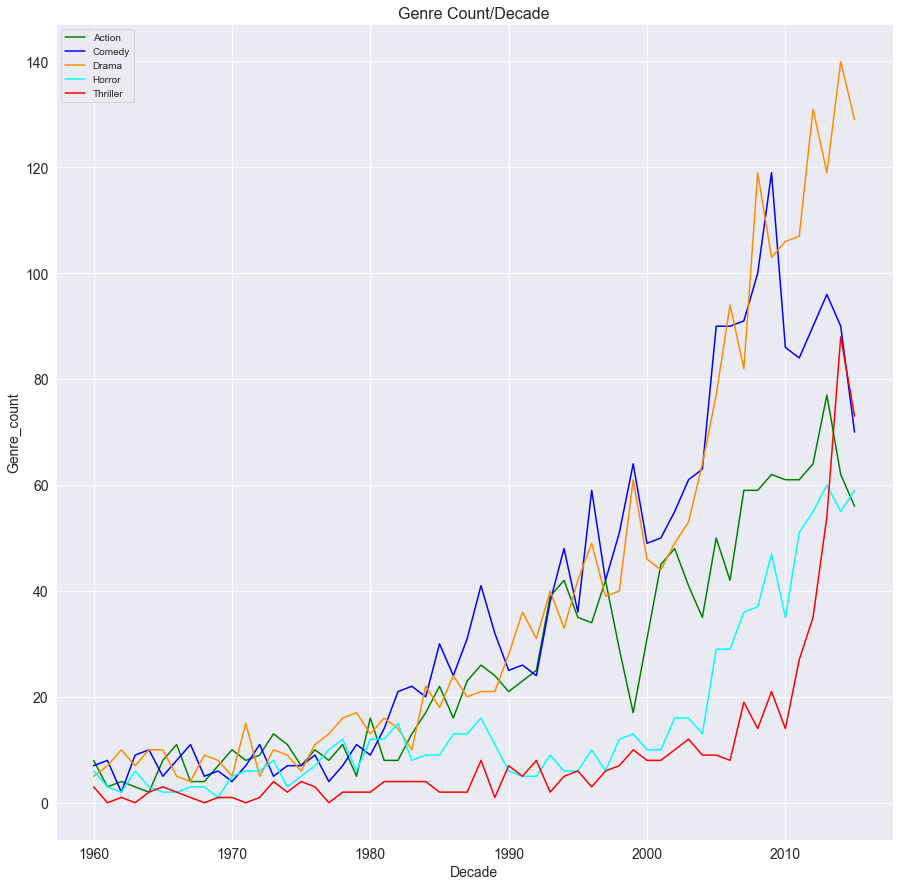

In [560]:
# Blow out the genre # per year of the first 5 most popular genres. 
fig, ax4 = plt.subplots(figsize=(15,15))
plt.plot(years, Action, "g", label = 'Action')
#plt.plot(years, Adventure, "--r", label = 'Adeventure')
#plt.plot(years, Animation, "-k", label = 'Animation')
plt.plot(years, Comedy, "b",  label = 'Comedy')
plt.plot(years, Drama, color="darkorange", label = 'Drama')
plt.plot(years, Horror, color="cyan", label = 'Horror')
plt.plot(years, Thriller, color="red",label = 'Thriller')
plt.legend(loc="upper left")
ax4.set_xlabel('Decade', fontsize=14)
ax4.set_ylabel('Genre_count', fontsize=14)
ax4.set_title('Genre Count/Decade', fontsize=16)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

## Plot Genre Count/Decade

The above plot can be further simplified. Below is an example to show the count of movie genre (e.g., Action) every decade:

In [561]:
decades = ('60s','70s','80s','90s','2000')
action60 = df_filt.query('release_year >= 1960 & release_year <= 1969 & main_genre.str.startswith("Ac").values')
action70 = df_filt.query('release_year >= 1970 & release_year <= 1979 & main_genre.str.startswith("Ac").values')
action80 = df_filt.query('release_year >= 1980 & release_year <= 1989 & main_genre.str.startswith("Ac").values')
action90 = df_filt.query('release_year >= 1990 & release_year <= 1999 & main_genre.str.startswith("Ac").values')
action20 = df_filt.query('release_year >= 2000 & release_year <= 2009 & main_genre.str.startswith("Ac").values')
action21 = df_filt.query('release_year >= 2010 & release_year <= 2015 & main_genre.str.startswith("Ac").values')
action60 = action60['main_genre'].count() 
action70 = action70['main_genre'].count() 
action80 = action80['main_genre'].count() 
action90 = action90['main_genre'].count() 
action20 = action20['main_genre'].count() 
#action21 = action21['main_genre'].count() 

action_count = (action60,action70,action80,action90,action20)

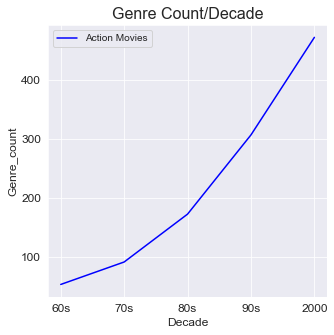

In [562]:
# Plot GENRE count per decade
fig, ax3 = plt.subplots(figsize=(5,5))
plt.plot(decades, action_count, "-b", label = 'Action Movies')
ax3.set_xlabel('Decade', fontsize=12)
ax3.set_ylabel('Genre_count', fontsize=12)
ax3.set_title('Genre Count/Decade', fontsize=16)
plt.legend(loc="upper left")
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)


In [563]:
sum(Horror)

853

In [564]:
# Plot genre histograme to show the genre with the most count
hi_count_genre = ['Thriller','Horror','Action','Comedy','Drama']
genre_count = np.array([sum(Thriller),sum(Horror), sum(Action), sum(Comedy),  sum(Drama) ])

genre_count

array([ 533,  853, 1479, 2084, 2223])

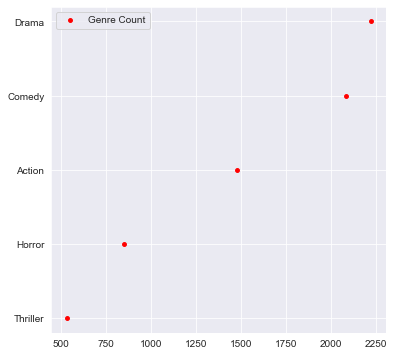

In [565]:
#genre_count scatter plot.
fig, ax5 = plt.subplots(figsize=(6,6))
plt.scatter(x=genre_count, y=hi_count_genre, s=15, c='r', label = 'Genre Count')
ax3.set_xlabel('Genre Count', fontsize=12)
ax3.set_ylabel('hi_count_genre', fontsize=12)
ax3.set_title('Genre Count/Decade', fontsize=14)
plt.legend(loc="upper left")

## Movie Ratings

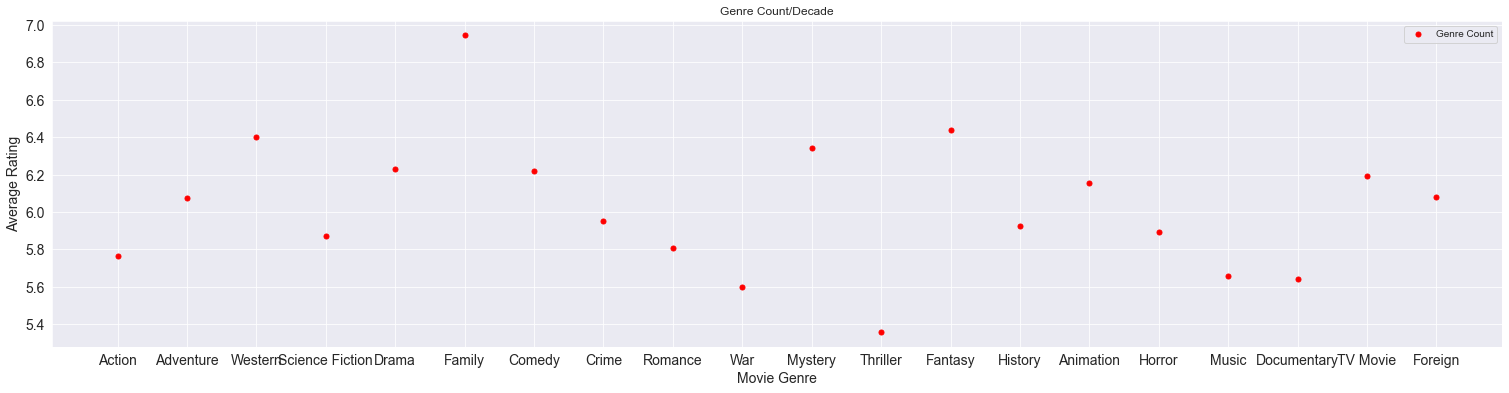

In [566]:

#labels = vote_average_genre.index.str.replace('_', ' ').str.title() # alternative to commented out line above

genre_num = df_filt['main_genre'].unique() 
genre_ratings = df_filt.groupby('main_genre').vote_average.mean()
genre_count = df_filt.groupby('main_genre').vote_count.sum()

location = np.arange(genre_num.size)
labels = genre_ratings.index.str.title() # alternative to commented out line above
heights = genre_ratings


#genre_count scatter plot.
fig, ax5 = plt.subplots(figsize=(26,6))
plt.scatter(x=genre_num, y=genre_ratings, s=25, c='r', label = 'Genre Count')
ax5.set_xlabel('Movie Genre', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
ax5.set_ylabel('Average Rating', fontsize=14)
plt.tick_params(axis='y', labelsize=14)
ax5.set_title('Genre Count/Decade')
plt.legend(loc="upper right")

#### The plot above suggests that the genre most produced is not necessarily the genres that will get the highest ratings. The qulaity of a movie and how well it was made, regadless of its genre, affect its ratings. In other words, many movies with low ratings boost the total number of movies belonging to some genres. 

#### Only 15% of the movies produced receive ratings >6.0, which is the average rating. 

## Ratings and Runtime  

In [53]:
# get stats on the runtime
av_runtime = df['runtime'].mean()
print(av_runtime)


std_runtime = df['runtime'].std()
print(std_runtime)


min_runtime = df['runtime'].min()
print(min_runtime)

max_runtime = df['runtime'].max()
print(max_runtime)

quant_runtime = df['runtime'].quantile([0.25, 0.5, 0.75])
quant_runtime

102.07179015186378
31.38270058126526
0
900


0.25     90.0
0.50     99.0
0.75    111.0
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Rating-Runtime Correlation')

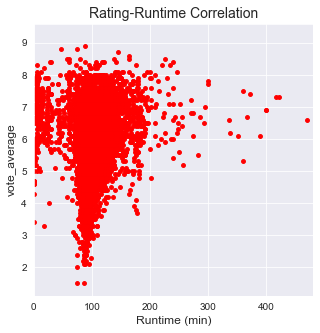

In [56]:
# check how lucrative movie production was over the years:
fig, ax21 = plt.subplots(figsize=(5,5))
plt.scatter(df['runtime'], df['vote_average'], s=15, c='r')
ax21.set_xlabel('Runtime (min)', fontsize=12)
ax21.set_xlim([0, 480])
ax21.set_ylabel('vote_average', fontsize=12)
ax21.set_title('Rating-Runtime Correlation', fontsize=14)
#plt.legend(loc="upper left")

#### The average runtime of movies is 102 +/- 31 minutes. Runtime does not seem to affect people ratings of the movie. 

## Prodcution Companies with Highest Ratings  

##### (It will be assumed that the main production company is the first one reported in the datasheet)

Split the production_compnaies row into multiple rows.  "main_co" will be consider the production company of every movie.

1- Total number of movies considered = 9,772 movies.  
2- 9,772 movies were produced by a total of 3,029 different production companies --> Find the top active production companies.   
3- Only 1,508 movies have high ratings (rating >=6).  
4- Check correlation between companies and rating.

In [87]:
# split the production company column 
prod_co_list = df['production_companies'].str[0:].str.split('|',expand = True)
num_co = prod_co_list.shape[1]
df_filt['main_co'] = prod_co_list[0]
df_filt['co2'] = prod_co_list[1]
df_filt['co3'] = prod_co_list[2]
df_filt['co4'] = prod_co_list[3]
df_filt['co5'] = prod_co_list[4]
df_filt.info;

In [88]:
df_filt['main_co'].size

9772

In [89]:
# find the number of production companies that produced the (9,772 movies) movies in the df_filt dataframe 
co_num = df_filt['main_co'].unique()
co_num.size
co_num

array(['Universal Studios', 'Village Roadshow Pictures',
       'Summit Entertainment', ..., 'Bruce Brown Films',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

In [90]:
# calculate average rating of movies by all production companies
co_rating = df_filt.groupby('main_co').vote_average.mean() 
co_rating;

In [91]:
#plot histogram of movie ratings and popularity
av_rating = df_filt['vote_average'].mean() 
av_rating

5.963528448628743

In [92]:
# find the most active production companies (the top 20)
active_prod_co = df_filt['main_co'].value_counts().head(20)

# create a list of the top 20 most productive production companies
labels = active_prod_co.index.str.title() # alternative to commented out line above
labels

Index(['Universal Pictures', 'Paramount Pictures', 'Columbia Pictures',
       'Twentieth Century Fox Film Corporation', 'Walt Disney Pictures',
       'New Line Cinema', 'Warner Bros.', 'Miramax Films', 'Tristar Pictures',
       'Columbia Pictures Corporation', 'Metro-Goldwyn-Mayer (Mgm)',
       '20Th Century Fox', 'Village Roadshow Pictures', 'United Artists',
       'Dreamworks Skg', 'Touchstone Pictures', 'Orion Pictures', 'Bbc Films',
       'Fox Searchlight Pictures', 'Lions Gate Films'],
      dtype='object')

In [93]:
## calculate the unique production companies
#genre_num = df_filt['main_genre'].nunique() 

In [94]:
active_prod_co

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
New Line Cinema                           206
Warner Bros.                              172
Miramax Films                             132
TriStar Pictures                          121
Columbia Pictures Corporation             119
Metro-Goldwyn-Mayer (MGM)                 104
20th Century Fox                           88
Village Roadshow Pictures                  79
United Artists                             73
DreamWorks SKG                             73
Touchstone Pictures                        72
Orion Pictures                             70
BBC Films                                  69
Fox Searchlight Pictures                   68
Lions Gate Films                           52
Name: main_co, dtype: int64

Text(0.5, 1.0, 'Active top 20 Production Company')

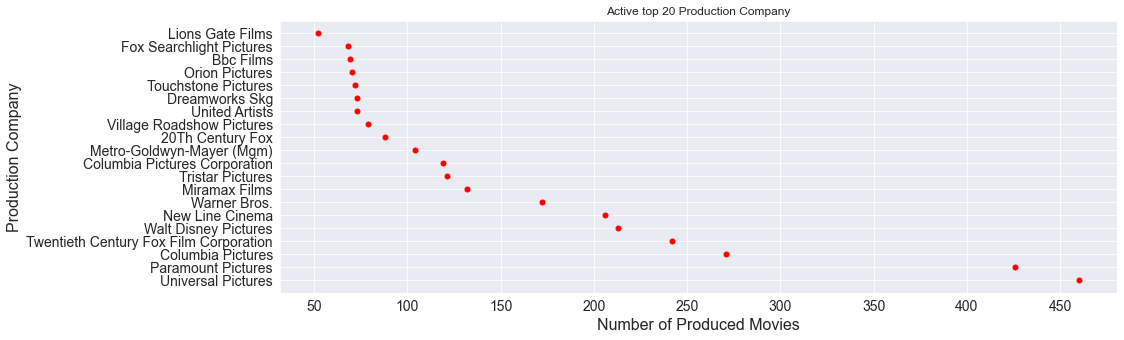

In [95]:
# Plot # of movies by topmost active production companies
fig, ax20 = plt.subplots(figsize=(15,5))
plt.scatter(x=active_prod_co, y=labels, s=25, c='r', label = 'Genre Count')
ax20.set_xlabel('Number of Produced Movies', fontsize = 16)
plt.tick_params(axis='x', labelsize=14)
ax20.set_ylabel('Production Company', fontsize = 16)
plt.tick_params(axis='y', labelsize=14)
ax20.set_title('Active top 20 Production Company')
#plt.legend(loc="upper right")


In [96]:
top_co_rating = [];
for n in labels:
    av_rating = df_filt[(df_filt['main_co'] == n)].vote_average.mean() 
#co_rating = df_filt.groupby('main_co').vote_average.mean().sort_values(ascending = False) 
    top_co_rating.append(av_rating)
    
top_co_rating;

#### The plot below shows that 18 out of the 20 most productive production companies have movie ratings above the average movie rating (5.96). 

Text(0.5, 1.0, 'Active top 20 Production Company')

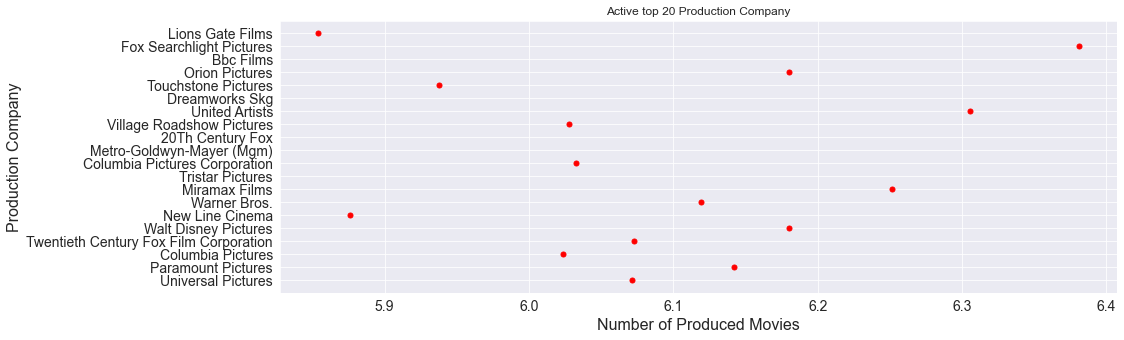

In [97]:
# Plot production count per decade
fig, ax21 = plt.subplots(figsize=(15,5))
plt.scatter(x=top_co_rating, y=labels, s=25, c='r', label = 'Genre Count')
ax21.set_xlabel('Number of Produced Movies', fontsize = 16)
plt.tick_params(axis='x', labelsize=14)
ax21.set_ylabel('Production Company', fontsize = 16)
plt.tick_params(axis='y', labelsize=14)
ax21.set_title('Active top 20 Production Company')
#plt.legend(loc="upper right")

In [99]:
# filter and leave only prodcution c|ompanies with high rating (rating >= 6) 
co_hi_rating = co_rating[co_rating >= 6] 
co_hi_rating;

## Cast Statistics  
#### 1- 10 Most Active Actors 
#### 2- Number of Movies and Average Movie Rating

#### We have 9,772 movies in the data set and only 3,798 different lead_cast.  

In [101]:
# get a list of the top 100 most active cast
active_cast = df_filt['lead_cast'].value_counts().sort_values(ascending = False) 
active_cast.head(50);

In [74]:
# cast with the highest movie ratings
hirating_cast = df_filt.groupby('lead_cast').vote_count.mean().sort_values(ascending = False) 
#movie_vote = df_filt['vote_count'].sort_values(ascending = False) 
hirating_cast.head(50);


#### Considering only the lead_cast member of the statistics can be misleading: 
1- The actual activity of many actors can be underestimated; as we know of very famous movies (God Father, etc.) have more than one famous actor in the cast. Rgardless of this argumnent, Nicolas Cage in 50 different movies as the lead cast is......surprising/impressive.  
2- The representation of female actress in underestimated; many movies will have famous female and male actors. This is seen with having only 3 female lead casts (Meryl Streep, Nicole Kidman, and Sandra Bullock) making the list. 



#### The lead casts members that got the most/highest number of votes is surprising. The number of votes does not correlate to how active the lead cast is. There is not enough data to correlate the cote_count to talent and/or experience.  

## Director Statistics  
#### 1- 10 Most Active Directors 
#### 2- Number of Movies and Average Movie Rating

In [78]:
# get a list of the directors with >= 15 movies produced since 1960
active_dir = (df_filt['lead_director'].value_counts())>=15 
active_dir;

In [102]:
# get a list of the top 10 most active Director
director_movie_count = df_filt['lead_director'].value_counts().sort_values(ascending = False).head(10)
director_movie_count;

In [103]:
dir_labels = director_movie_count.index.str.title() # alternative to commented out line above
dir_labels

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese',
       'Ridley Scott', 'Ron Howard', 'Steven Soderbergh', 'Joel Schumacher',
       'Brian De Palma', 'John Carpenter'],
      dtype='object')

Text(0.5, 1.0, 'Active topmost 10 Directors')

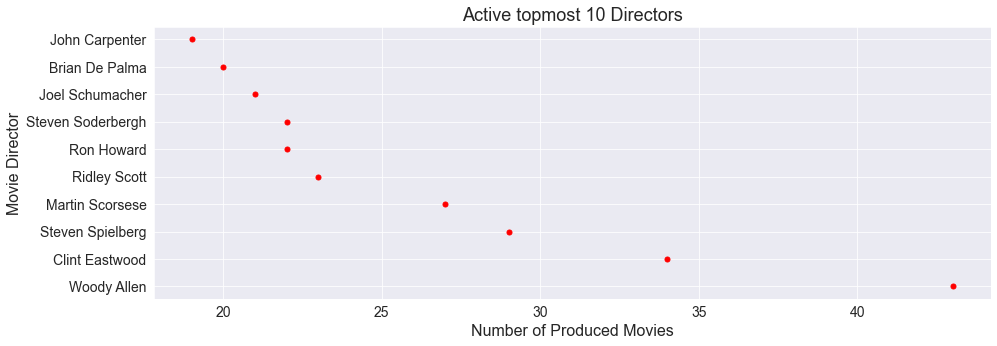

In [104]:
# Plot # of movies by topmost active production companies
fig, ax25 = plt.subplots(figsize=(15,5))
plt.scatter(x=director_movie_count, y=dir_labels, s=25, c='r', label = 'Genre Count')
ax25.set_xlabel('Number of Produced Movies', fontsize = 16)
plt.tick_params(axis='x', labelsize=14)
ax25.set_ylabel('Movie Director', fontsize = 16)
plt.tick_params(axis='y', labelsize=14)
ax25.set_title('Active topmost 10 Directors',fontsize = 18)
#plt.legend(loc="upper right")

In [105]:
direct_list = ['lead_director','vote_average','revenu_adj']

active_dir_stats = df_filt[df_filt.lead_director.isin(dir_labels)]
active_dir_stats;

active_dir_stats2 = [active_dir_stats['lead_director'], active_dir_stats['vote_average'], active_dir_stats['revenue_adj']]
active_dir_stats;

In [106]:
dir_labels[:5]

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese',
       'Ridley Scott'],
      dtype='object')

Text(0.5, 1.0, "Active topmost 10 Directors' Ratings")

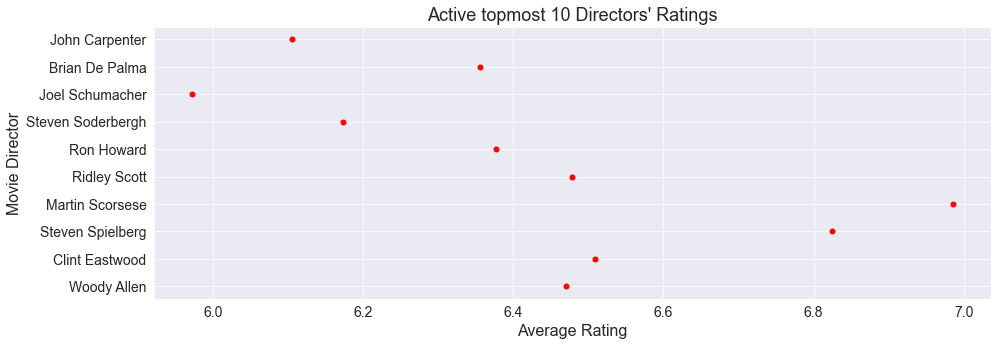

In [107]:
active_dir_av_rating = []
active_dir_cum_revenue = []

for n in range(dir_labels.shape[0]):
    indiv_dir_stat = active_dir_stats.loc[(active_dir_stats['lead_director'].str.startswith(dir_labels[n])),['lead_director','revenue_adj','vote_average']]
    indiv_dir_vote_av = indiv_dir_stat['vote_average'].mean()
    indiv_dir_cum_rev = indiv_dir_stat['revenue_adj'].sum()
    
    active_dir_av_rating.append(indiv_dir_vote_av)
    active_dir_cum_revenue.append(indiv_dir_cum_rev)

# Plot # of movies by topmost active production companies
fig, ax26 = plt.subplots(figsize=(15,5))
plt.scatter(x=active_dir_av_rating, y=dir_labels, s=25, c='r', label = 'Genre Count')
ax26.set_xlabel('Average Rating', fontsize = 16)
plt.tick_params(axis='x', labelsize=14)
ax26.set_ylabel('Movie Director', fontsize = 16)
plt.tick_params(axis='y', labelsize=14)
ax26.set_title("Active topmost 10 Directors' Ratings",fontsize = 18)
#plt.legend(loc="upper right")

#### Sorcose's movies have the highest average ratings....followed very closely by Spielberg.

Text(0.5, 1.0, "Active topmost 10 Directors' Revenue")

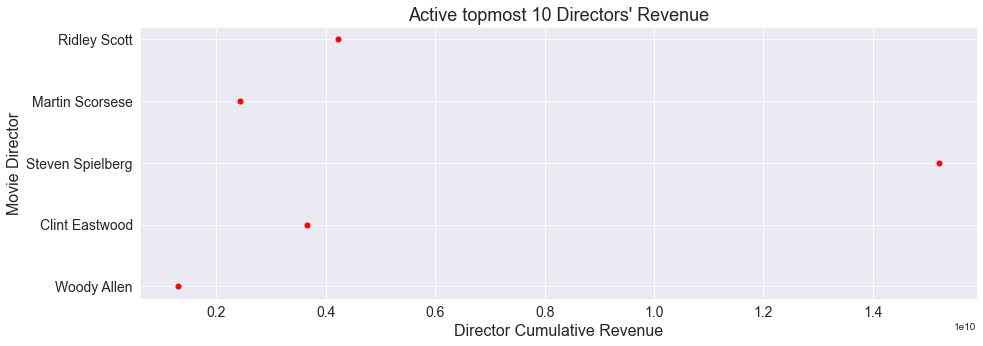

In [108]:
# Plot # of movies by topmost active production companies
fig, ax26 = plt.subplots(figsize=(15,5))
plt.scatter(x=active_dir_cum_revenue[:5], y=dir_labels[:5], s=25, c='r', label = 'Genre Count')
ax26.set_xlabel('Director Cumulative Revenue', fontsize = 16)
plt.tick_params(axis='x', labelsize=14)
ax26.set_ylabel('Movie Director', fontsize = 16)
plt.tick_params(axis='y', labelsize=14)
ax26.set_title("Active topmost 10 Directors' Revenue",fontsize = 18)
#plt.legend(loc="upper right")


#### Spielberg (with his 29 movies) has by far the highest movie revenue compared with directors with similar or even higher movies directed.  

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Here are the main conclusions of the statistical analysis done on the TMDB movie dataset:

#### 1- Movie making is a great investment. Production companies "tripple" their money making movies. Their Cumulative revenues has been steadily climbing over the years. 

#### 2- Both popularity and vote_count have skewed distributions. the majority of the movies (10,632 movies) have 2000 vote counts or less. About ~2% of the movies get remarkably high vote count (>2000 counts). There is not enough data to understand the reason of this high count. They might be the result of duplicate/inaacurate reporting. This skweness in reported vote counts goes hand in hand with the skewness in popularity (popularity and vote_count are positively correlated) does not seem to affect the average rating that follow a normal distribution with a mean average movie rating of 5.96. 

#### 3- There does not seem to be a correlation showing that the vote_count gives a more reliable vote_average or rating.   

####  4- It is unclear what the "popularity" values mean, if other than the movie was popular enough to draw so many vote counts. This is indicated by the the positive correlation between vote_count and popularity. The former seems to reflect the viewers' interest in a movie and willingness to give an opinion anout it.  

#### 5- Movie production has been steadily increasing since 1960. This comes as no surprise knowing that movie revenues are 3x the budget spent making them.  

#### 6- The average runtime of movies is 102 +/- 31 minutes. Runtime does not seem to affect people ratings of the movie.  

#### 7- The most abundant movie genres are: Drama, Comedy, and Action. These 3 genres have been increasing steadily sicne 1980. Other genres, such as Horror and Thriller, start to catch up (in number/year) since 2002 or shortly after. The rest of genres had increased shyly in numbers over the years (Adventures, Animation, Crime, etc.) or not at all (e.g., western movie).  

#### 8- Only 15% of the movies produced receive ratings > 6.0, which is the average rating.  

#### 9- The 10 top most productive production companies and their total movie produced since 1960 are:  
- Universal Pictures, 460  
- Paramount Pictures, 426  
- Columbia Pictures + Columbia Pictures Corporation, 271 + 119   
- 20th Century Fox, 242  
- Walt Disney Pictires, 213  
- New Line Cinema, 206  
- Warner Bros., 172  
- Miramax Films, 132  
- Tristar Pictures, 121  
- MGM, 104

##### 18 out of the 20 most productive production companies have movie ratings above the average movie rating (5.96).  

#### 10  The top most active lead_casts are:  
- Nicolas Cage, 50  
- Robert De Niro, 42  
- Bruce Willis, 39  
- Clint Eastwood, 38  
- Johnny Depp, Tom Hanks, 37  
- Sylvester Stallone, 36 
- Robin Williams, Denzel Washington, John Travolta, Jean-Claude Van Damme, 33  
- Tom Cruise, 31  
- Steve Martin, Harrison Ford, 30  
- Woody Allen, Samuel L. Jackson, Arnold Schwarzenegger, Sean Connery, John Cusack, Eddie Murphy, 29  
- Kevin Costner, Al Pacino, Adam Sandler, Steven Seagal, Mel Gibson, 28  
- Keanu Reeves, 27  
- Michael Douglas, Ben Stiller, 26  
- Jeff Bridges, Kurt Russell, Jack Nicholson, 25  
- Richard Gere,Jim Carrey, Dennis Quaid, Liam Neeson, Robert Redford, 24  
- Matt Damon, Mark Wahlberg, 23  
- Ben Affleck, 22  
- Leonardo DiCaprio, John Wayne,Wesley Snipes,Bill Murray, 21  
- Jason Statham, Michael Caine, Elijah Wood, Sean Penn, 20  

- Sandra Bullock, Nicole Kidman, Meryl Streep, 24  

#### The lead casts members that got the most/highest number of votes is surprising. 

#### Considering only the lead_cast member of the statistics can be misleading: 
1- The actual activity of many actors can be underestimated; many movies (e.g., God Father, etc.) have more than one famous actor in the cast. Rgardless of this argumnent, Nicolas Cage appearing as the lead_cast in 50 different movies is......surprising/impressive.  
2- The representation of female actress in underestimated; many movies will have famous female and male actors. This is seen with having only 3 female lead casts (Meryl Streep, Nicole Kidman, and Sandra Bullock) making the list.  


#### The number of votes a movie gets does not seem to correlate to how active the lead cast is. There is not enough data to correlate the vote_count to talent and/or experience. 

#### 11- The 10 top most active directors since 1960 are:  
- Woody Allen, 43  
- Clint Eastwood, 34  
- Steven Spielberg, 29 
- Martin Scorsese, 27  
- Ridley Scott, 23  
- Ron Howard, Steven Soderbergh, 22  
- Joel Schumacher, 21  
- Brian De Palma, 20  
- John Carpenter, 19  

#### Sorcose's movies have the highest average ratings....followed very closely by Spielberg.
#### Spielberg (with his 29 movies) has, by far, the highest movie revenue compared with directors with similar or even more movies under their belt.  Hiring Spielberd to direct seems to guarantee an even better return on investiment ratio than 3:1.

### Some limitations/issues with the given dataset:

#### 1- The shape of the df_slim dataframe shows that 1,093 data points were lost from the original data set because the movies did not have all attributes reported.  

#### 2- Considering only the lead_cast in the statistics showing active actors masks the activity of some and underestimate the representation of female actresses.


### N.B.: Python, Pandas help sites, module documentaries and tutorials were consulted for various functions.  Sites like "Github" and GeeksforGeeks were very helpful reading suggestion of how to filter and query with multiple conditions. 
